<h1>Chess AI: Min Max Algorithm</h1><br>

First off we're using python-chess version 0.15.2 to handle<br>
the board, valid moves, etc. That way we can focus on the AI element.<br>

<b>python-chess:</b>
- https://python-chess.readthedocs.io/en/v0.15.0/core.html

In [39]:
#import the python-chess library
import chess

Next we read from the config.txt file so that we can see how<br>
many moves we're allowed to make before the game ends due to<br>
turn limitation. <br>

In [40]:
#read in the turn limit
with open('config.txt', 'r') as f:
    turnLim = f.readline()
print("The maximum number of moves for a player is: " + turnLim)

The maximum number of moves for a player is: 100


In [41]:
moveNum = 0

<h2>1.1 Setting up the Board</h2><br>

The initial state of the board being set up is done as follows:<br>
<font color="red">chess.Board('1n2k3/8/8/8/8/8/8/R3K1N1 w - - 0 0')</font><br>

The numbers represents empty squars starting from the top left of the board<br>
going line by line from top left to bottom right. Capital letters represent<br>
white pieces and lower case represent black pieces. The w signifies it's white's<br>
turn. 

In [42]:
def setupBoard():
    if moveNum < 1:
        return chess.Board('1n2k3/8/8/8/8/8/8/R3K1N1 w - - 0 0')

Now we can print an ASCI representation of the board.

In [47]:
print(setupBoard())

. n . . k . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
R . . . K . N .


<h2>1.2 Displaying the Board</h2><br>
Now we need to import two functions for displaying the board.<br>
- display
- SVG

In [44]:
#Import display for displaying an svg representation of the board
from IPython.display import display, SVG    

In [45]:
def showMove(board):
    return display(SVG(board._repr_svg_()))

Now when the initial board is created we can show the Board in a<br>
nice graphical vector image representation!

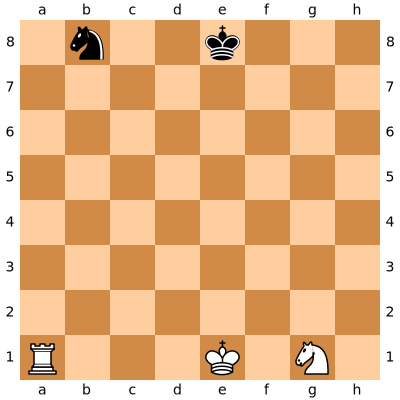

In [46]:
b = setupBoard()
showMove(b)